In [4]:
import json
array = []
with open("sarcasm.json", 'r') as f:
    for line in f:
        array.append(json.loads(line))
    
sentences = []
labels = []
urls = []

for item in array:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])
    
    

In [5]:
training_size = 20000

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.6637 - accuracy: 0.5842 - val_loss: 0.5743 - val_accuracy: 0.6965 - 991ms/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.4171 - accuracy: 0.8324 - val_loss: 0.3759 - val_accuracy: 0.8432 - 673ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 0.3002 - accuracy: 0.8811 - val_loss: 0.3584 - val_accuracy: 0.8404 - 684ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 0.2481 - accuracy: 0.9018 - val_loss: 0.3473 - val_accuracy: 0.8506 - 668ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 0.2140 - accuracy: 0.9155 - val_loss: 0.3454 - val_accuracy: 0.8557 - 729ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1869 - accuracy: 0.9289 - val_loss: 0.3570 - val_accuracy: 0.8547 - 805ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1654 - accuracy: 0.9377 - val_loss: 0.3774 - val_accuracy: 0.8506 - 745ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 0.1455 - accuracy: 0.9479 - val_loss: 0.4131 - val_accuracy: 0.8407 - 728ms/epoch - 1ms/step


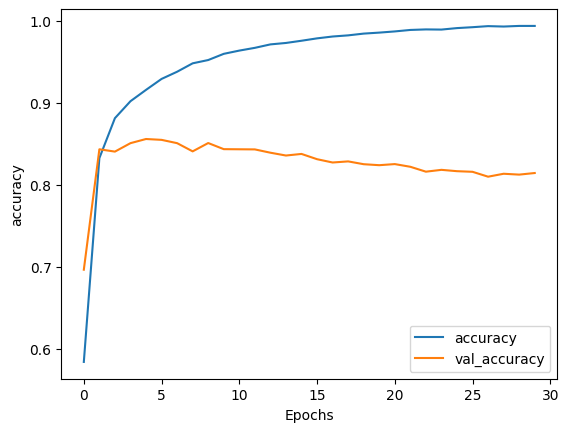

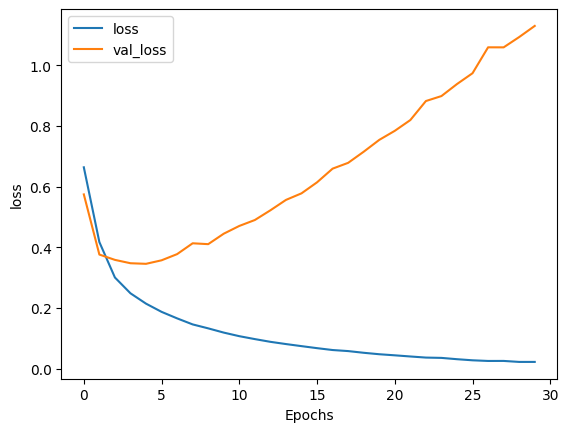

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
sentence = ["He is such a genius he fails everytime", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 44ms/step
[[9.9900717e-01]
 [3.5252451e-05]]


In [14]:
model.save("sarcasmModel2.keras")

In [15]:
reconstructed_model = tf.keras.models.load_model("sarcasmModel1.keras")

In [16]:
reconstructed_model.predict(padded)

1/1 [==============================] - 0s 29ms/step


array([[9.9541259e-01],
       [1.3045484e-04]], dtype=float32)